### Load packages

In [7]:
import anndata
import spaco2

import scanpy as sc

import matplotlib
import seaborn as sns

import numpy as np

### 01. Spaco with cell_bin data

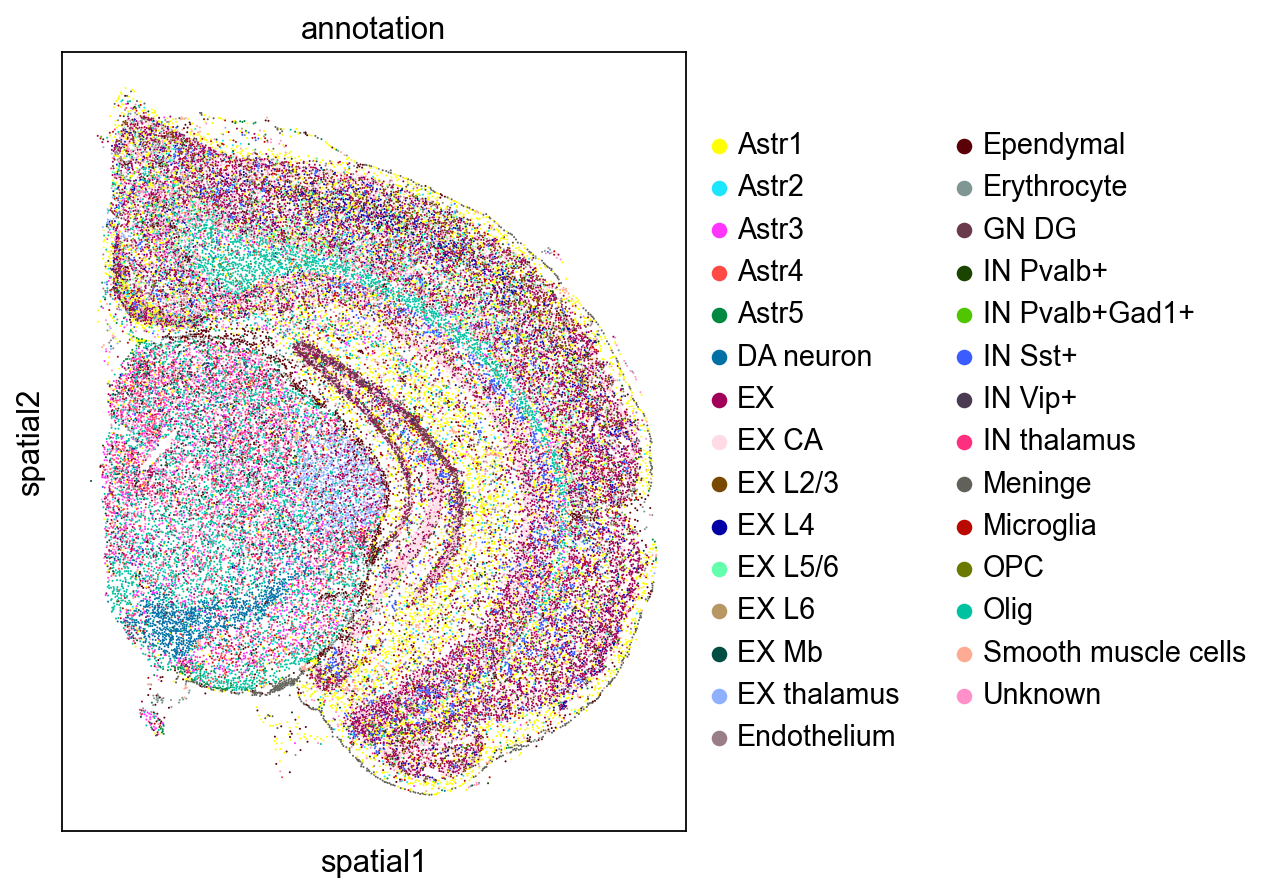

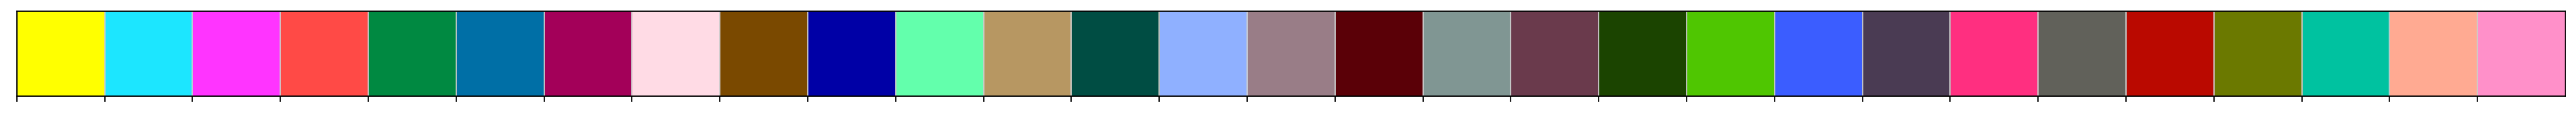

In [11]:
#--- cell_bin data
adata_cellbin = anndata.read("../../../Mouse_brain_cell_bin.h5ad")

# Default colorization
sc.set_figure_params(figsize=(5,7), facecolor="white")
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=35)

# Get the above (default) color palette
palette = adata_cellbin.uns['annotation_colors'].copy()
sns.palplot(palette)

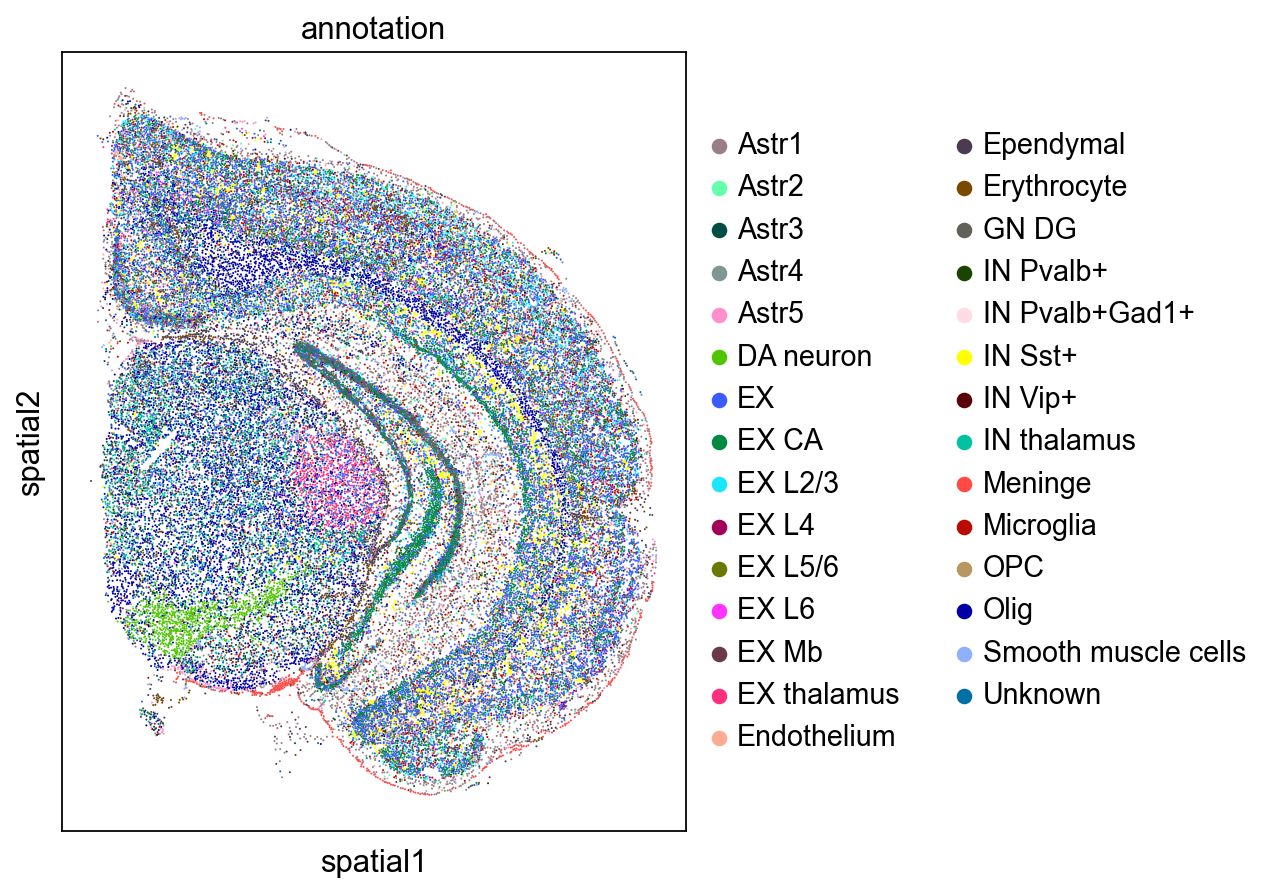

In [21]:
# Random palette
palette_random = palette.copy()
np.random.seed(1122)
np.random.shuffle(palette_random)
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=35, palette=palette_random.tolist())

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster neighbor size...
|-----------> Calculating cluster centroid distance...
|-----------> Calculating cluster interlacement score...
|-----------> Summarizing scores...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...
|-----------> Solving TSP for cluster graph...
|-----------> Solving TSP for color graph...
|-----> Optimizing cluster color mapping...


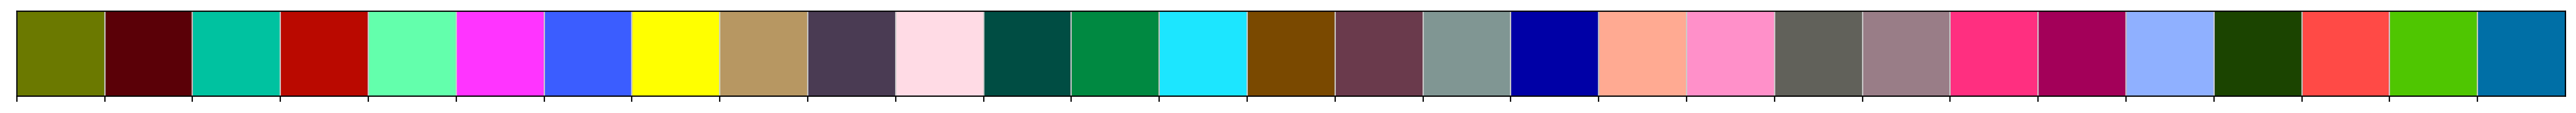

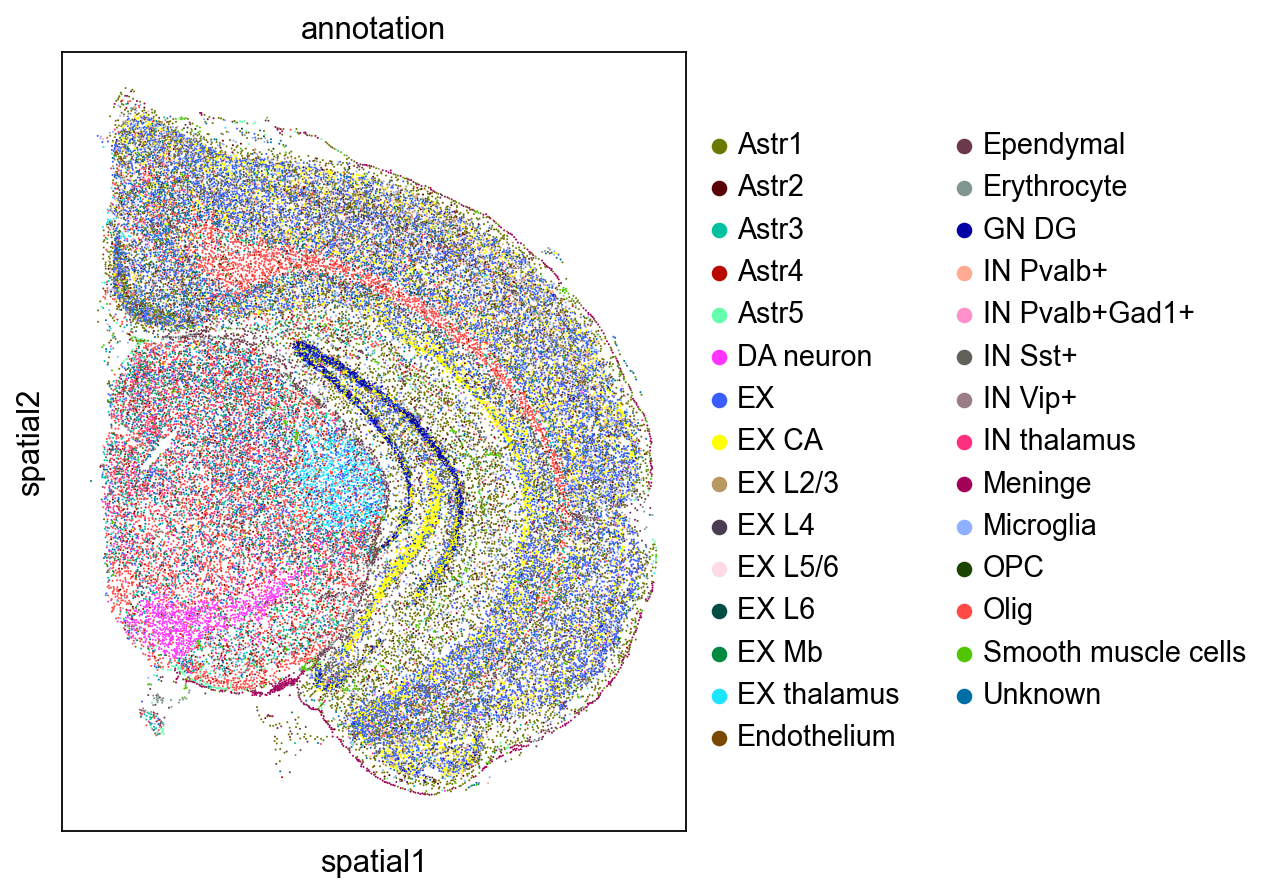

In [4]:
color_mapping = spaco2.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    palette=palette,
    radius=90, 
    n_neighbors=16,
    solver="heuristic"
)
sns.palplot(list(color_mapping.values()))

# Order colors by categories in adata
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
adata_cellbin.uns['annotation_colors'] = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=35)

### 02. Spaco with bin data

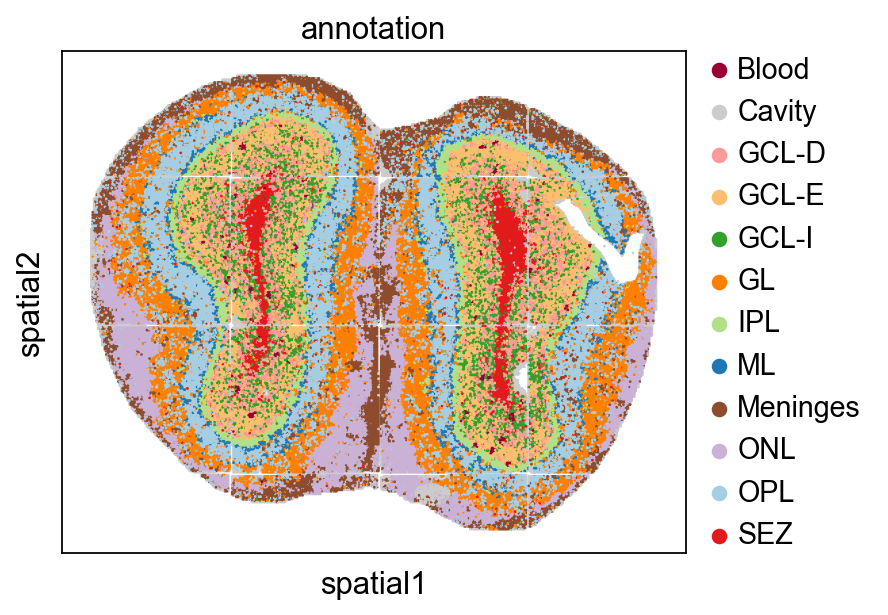

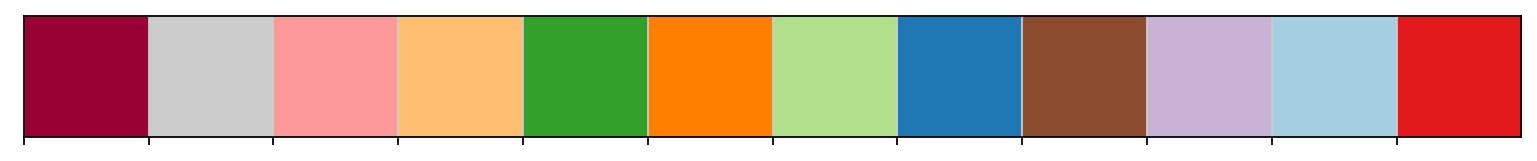

In [8]:
#--- bin data
adata_bin = anndata.read("../../../Mouse_olfa_S1.h5ad")

# Default colorization
sc.set_figure_params(figsize=(5,7), facecolor="white")
sc.pl.spatial(adata_bin, color="annotation", spot_size=2)

# Get the above (default) color palette
palette = adata_bin.uns['annotation_colors'].copy()
sns.palplot(palette)

# Convert to 3-channel
palette = np.array([i[0:7] for i in palette], dtype=object)

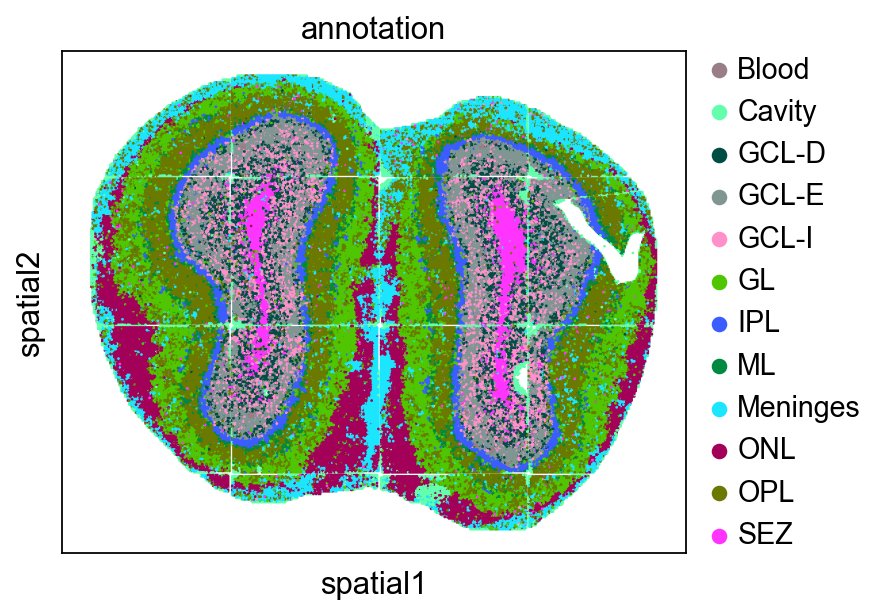

In [20]:
# Random palette
palette_random = palette.copy()
np.random.seed(1122)
np.random.shuffle(palette_random)
sc.pl.spatial(adata_bin, color="annotation", spot_size=2, palette=palette_random.tolist())

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster neighbor size...
|-----------> Calculating cluster centroid distance...
|-----------> Calculating cluster interlacement score...
|-----------> Summarizing scores...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...
|-----------> Solving TSP for cluster graph...
|-----------> Solving TSP for color graph...
|-----> Optimizing cluster color mapping...


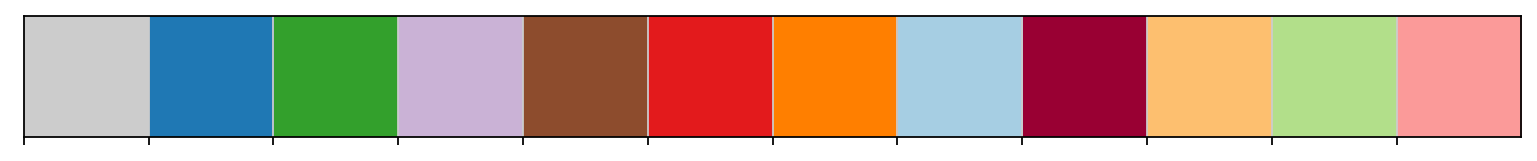

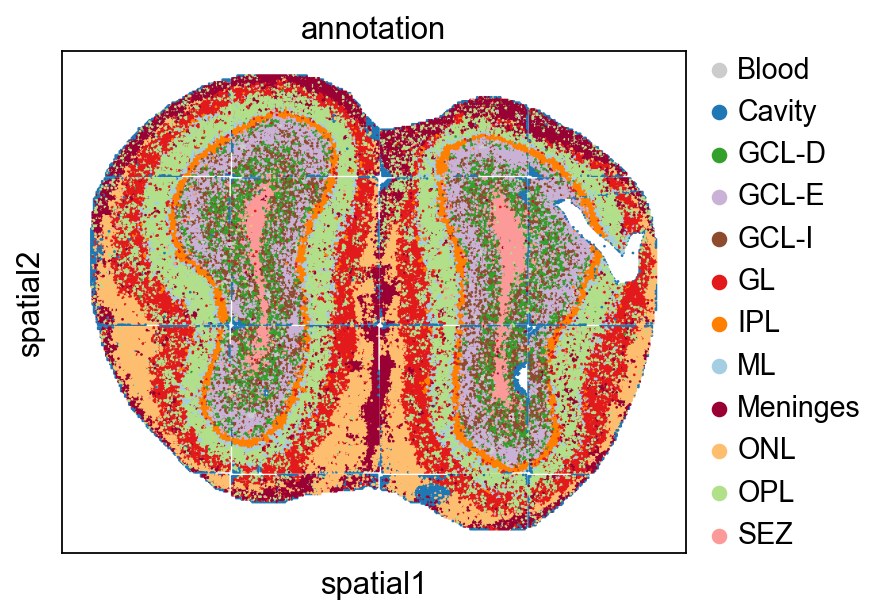

In [4]:
color_mapping = spaco2.colorize(
    cell_coordinates=adata_bin.obsm['spatial'],
    cell_labels=adata_bin.obs['annotation'],
    palette=palette,
    radius=5, 
    n_neighbors=16,
    solver="heuristic"
)
sns.palplot(list(color_mapping.values()))

# Order colors by categories in adata
color_mapping = {k: color_mapping[k] for k in adata_bin.obs['annotation'].cat.categories}

# Set new colors for adata
adata_bin.uns['annotation_colors'] = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_bin, color="annotation", spot_size=2)

### 03. Spaco with multi-slice

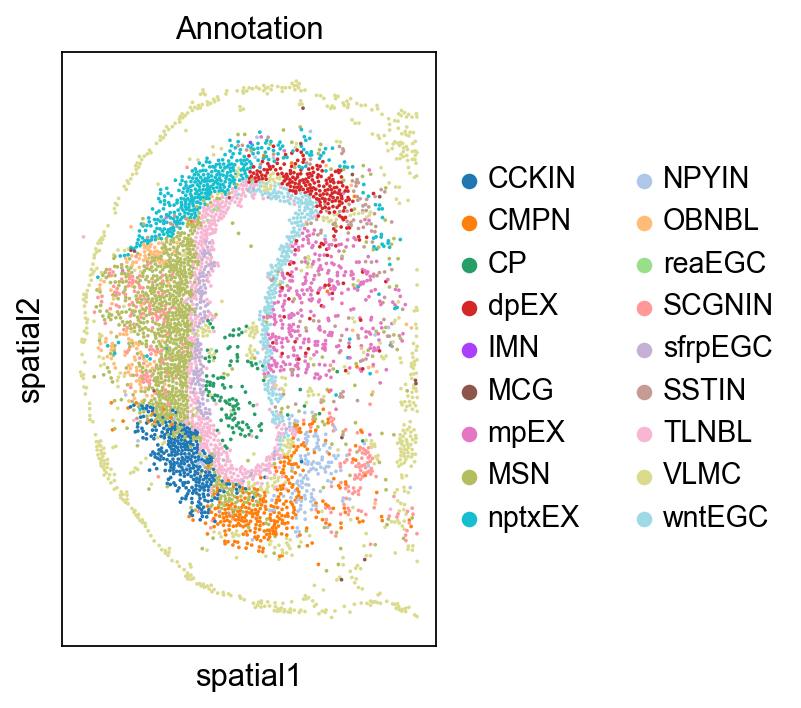

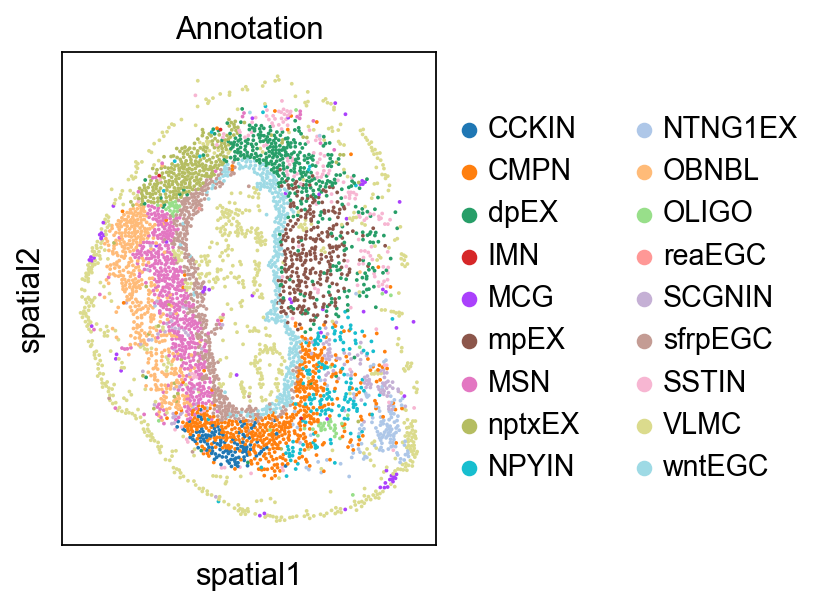

In [8]:
# Default colorization
adata_cellbin = anndata.read("../../../10DPI_1_left.h5ad")
adata_cellbin2 = anndata.read("../../../15DPI_1_left.h5ad")

sc.set_figure_params(figsize=(3,5), facecolor="white")
sc.pl.spatial(adata_cellbin, color="Annotation", spot_size=35)
sc.pl.spatial(adata_cellbin2, color="Annotation", spot_size=35)

|-----> Calculating cluster distance graph for slice 0... 
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster neighbor size...
|-----------> Calculating cluster centroid distance...
|-----------> Calculating cluster interlacement score...
|-----------> Summarizing scores...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating cluster distance graph for slice 1... 
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster neighbor size...
|-----------> Calculating cluster centroid distance...
|-----------> Calculating cluster interlacement score...
|-----------> Summarizing scores...
|-----------> Constructing cluster interlacement graph...
|-----> Merging cluster distance graph... 
|-----> `palette` not provided.
|-----------> Auto-generating colors from CIE Lab colorspace...
|-----------------> Calculati

c:\Users\zhuqianhua\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\zhuqianhua\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


|-----------------> Rescaling embedding to CIE Lab colorspace...
|-----> Optimizing cluster color mapping...


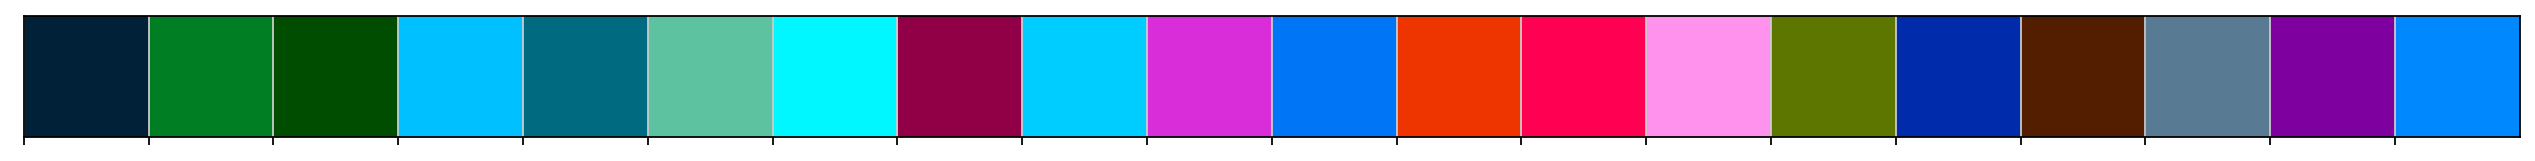

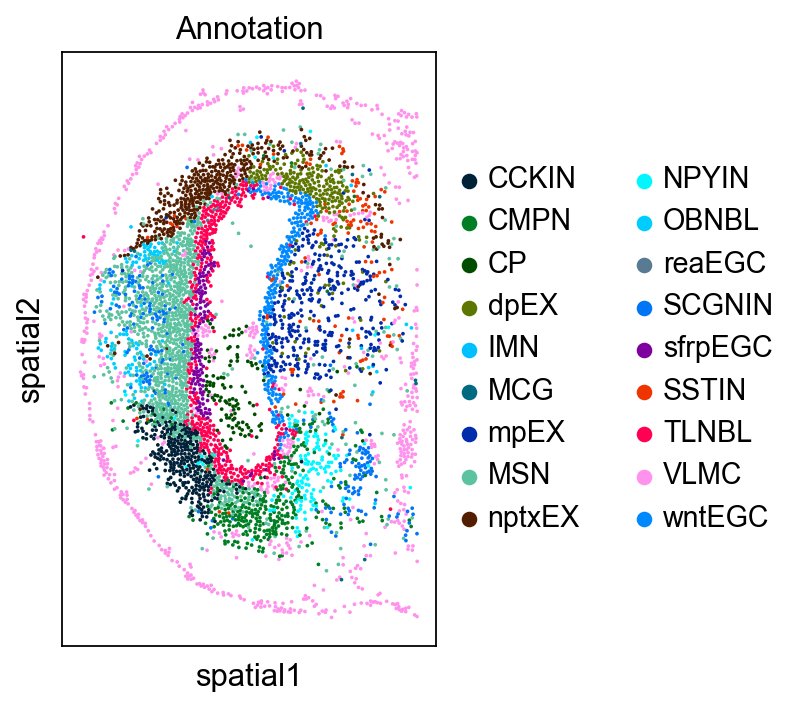

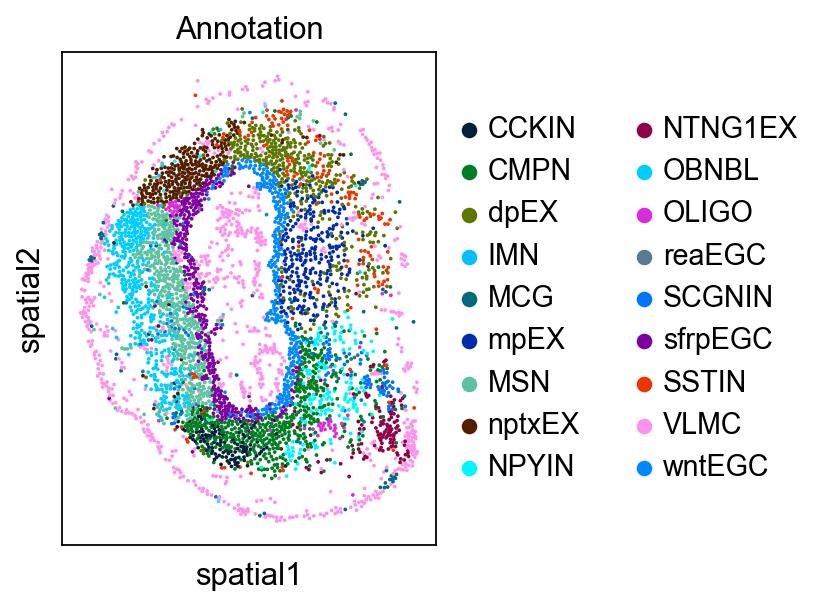

In [9]:
color_mapping = spaco2.colorize_mutiple_slices(
    adatas=[adata_cellbin, adata_cellbin2],
    cluster_key='Annotation',
    slice_mapping="annotation",
    spatial_key="spatial",
    n_neighbors=16,
    radius=90,
    solver="heuristic"
)
sns.palplot(list(color_mapping.values()))

# Order colors by categories in adata
color_mapping_1 = {k: color_mapping[k] for k in adata_cellbin.obs['Annotation'].cat.categories}
color_mapping_2 = {k: color_mapping[k] for k in adata_cellbin2.obs['Annotation'].cat.categories}

# Set new colors for adata
adata_cellbin.uns['Annotation_colors'] = list(color_mapping_1.values())
adata_cellbin2.uns['Annotation_colors'] = list(color_mapping_2.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="Annotation", spot_size=35)
sc.pl.spatial(adata_cellbin2, color="Annotation", spot_size=35)